# **Introdução a Análise de Dados em Python**
`WANDA 2023`

### **Ministrante:** Ednael Vieira
  - MBA Ciência de Dados (Projeto CIn/Samsung)
  - Msc Engenharia de Produção (PPGEP)
  
### Introdução - O que é Ciência de Dados (Data Science)?

<img src="ds.png" alt="alt text" width="70%" height="auto" class="blog-image">

# Etapas genéricas de um projeto de DS
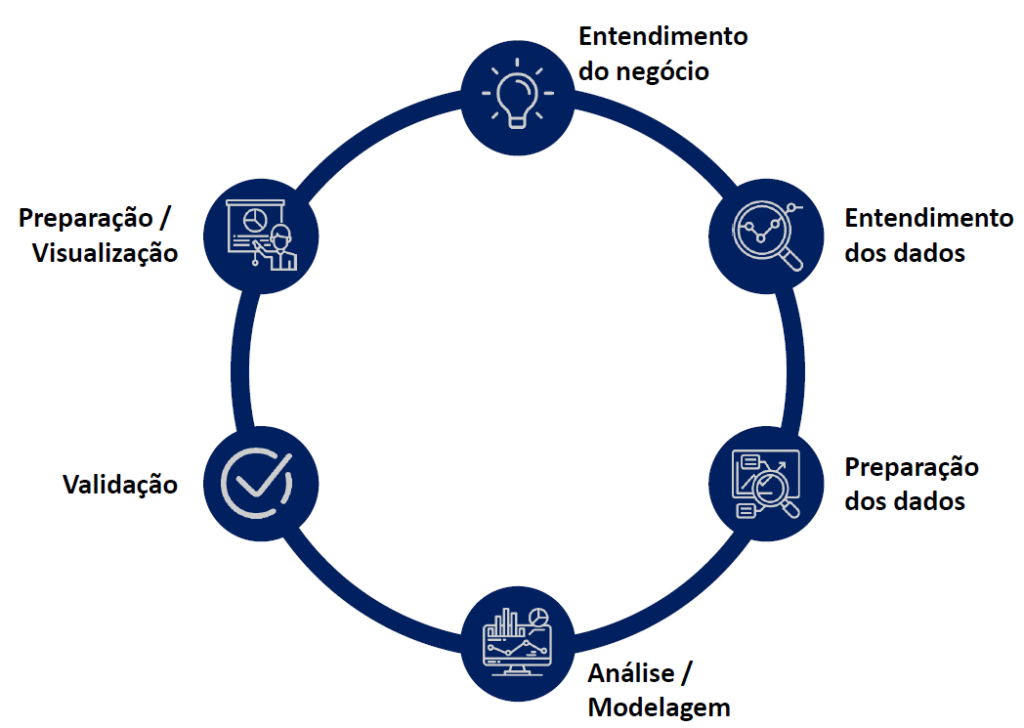

# **Fase 1: Problema de pesquisa**
- O que desejamos compreender ou que resultados desejamos obter?
- Qual caminho desejamos traçar para obtenção destes resultados, ou o que desejamos fazer com estes resultados?


## Problema de pesquisa: Quais fatores influenciam a qualidade do sono das pessoas de maneira geral?

- Existem grupos de pessoas que são mais propensas a terem disturbios no seu sono? Quais são essas pessoas
- Será que homens ou mulheres tendem a ter dificuldades ao dormir?
- A profissão de uma pessoa pode influir na qualidade do seu sono?
- O estilo de vida sedentário ou não influi na qualidade do sono das pessoas, de maneira geral?

# Fase 2: Entendimento dos dados

- Nome do dataset: Sleep Health and Lifestyle Dataset
- Fonte: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/

Dataset Columns:
- Person ID: An identifier for each individual.
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Daily Steps: The number of steps the person takes per day.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

Details about Sleep Disorder Column:

- None: The individual does not exhibit any specific sleep disorder.
- Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.


## Importação

In [1]:
#Bibliotecas nececessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# importação direto do repositório online
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv',index_col=[0])

## Visão geral sobre os dados

- Visão tabulada 
- Busca por dados faltantes
- Busca por outliers
- Estudo de correlações

### `Visão tabulada`

In [4]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


`Estatísticas descritivas acerca dos dados`
<br> Obs: O próprio Pandas já realiza a operação apenas com os atributos do tipo numérico

In [5]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### `Busca por faltantes`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [19]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Os dados não apresentam valores faltantes. Caso houvesem, os seguinte métodos poderiam ter sido aplicados: <br>
- Substituição dos dados ausentes pela média dos demais
- Substituição dos dados ausentes pela mediana
- Substituição dos faltantes por valores (ou textos) aleatórios presentes na respectiva coluna

In [20]:
df['Daily Steps'].value_counts()
#normalize=True, ascending=True

8000     101
6000      68
5000      68
7000      66
10000     36
5500       4
3000       3
3500       3
4000       3
6800       3
4800       2
7300       2
7500       2
4200       2
3300       2
5600       2
5200       2
4100       2
3700       2
6200       1
Name: Daily Steps, dtype: int64

In [21]:
df['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

### `Correlações`

Teste de correlação de Pearson (também possível configurar o teste de Spearman e KM)

In [7]:
df.corr()

C:\Users\ednae\AppData\Local\Temp\ipykernel_2976\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


`Visualização em Heatmap`

In [10]:
import seaborn as sns

In [11]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

`Recorte apenas para os dados numéricos`

In [12]:
df_num = df.drop(['Gender','Occupation','BMI Category','Blood Pressure',
                 'Sleep Disorder'],axis=1)

In [17]:
# O dataframe original permanece inalterado, pois não fizemos uso do comando inplace=True 
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [18]:
df_num.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,,,,,,,
1,27,6.1,6,42,6,77,4200
2,28,6.2,6,60,8,75,10000
3,28,6.2,6,60,8,75,10000
4,28,5.9,4,30,8,85,3000
5,28,5.9,4,30,8,85,3000


<Axes: >

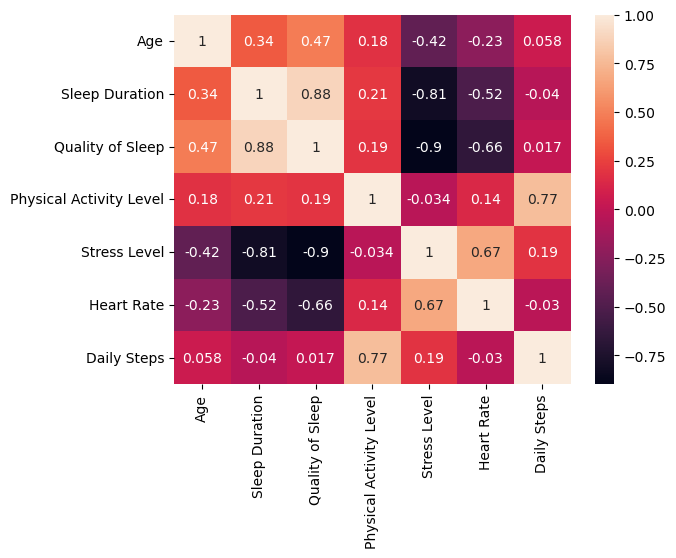

In [19]:
sns.heatmap(df_num.corr(),annot=True)

Pudemos perceber que o fator que mais influencia a qualidade do sono de uma pessoa, é o nível de estresse, com uma correlação negativa, de -0,9. Indicando que quanto maior o nível de estresse, menor a qualidade do sono (e vice-versa). Essa relação será mais observada durante a análise

`Para obtenção de uma estatística descritiva dos dados, poderiamos ainda lançar mão da biblioteca: pandas-profiling`

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Profiling Report")

### Gráficos de análise, inicias
- BoxPlot
- Histograma

<Axes: >

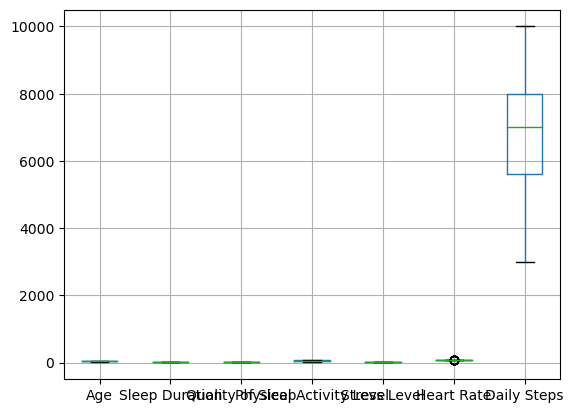

In [20]:
df_num.boxplot()

Este boxplot é pouco relevante para análise, e requer ajustes, principalmente, uma normalização <br>dos dados para uma melhor visualização de todos os atributos lado a lado

### Ajuste dos dados numéricos

In [21]:
df_num = df.drop(['Occupation','Gender','BMI Category','Sleep Disorder','Blood Pressure'],axis=1)

In [23]:
for coluna in df_num:
    df_num[coluna] = df_num[coluna] / df_num[coluna].max()

In [24]:
df_num

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,,,,,,,
1,0.457627,0.717647,0.666667,0.466667,0.750,0.895349,0.42
2,0.474576,0.729412,0.666667,0.666667,1.000,0.872093,1.00
3,0.474576,0.729412,0.666667,0.666667,1.000,0.872093,1.00
4,0.474576,0.694118,0.444444,0.333333,1.000,0.988372,0.30
5,0.474576,0.694118,0.444444,0.333333,1.000,0.988372,0.30
...,...,...,...,...,...,...,...
370,1.000000,0.952941,1.000000,0.833333,0.375,0.790698,0.70
371,1.000000,0.941176,1.000000,0.833333,0.375,0.790698,0.70
372,1.000000,0.952941,1.000000,0.833333,0.375,0.790698,0.70


Apenas a normalização efetuada e também para demonstrar que o Python vai realizar os comandos pedidos, mesmo que não façam sentido ou gerem resultados não satisfatórios, executaremos o código abaixo

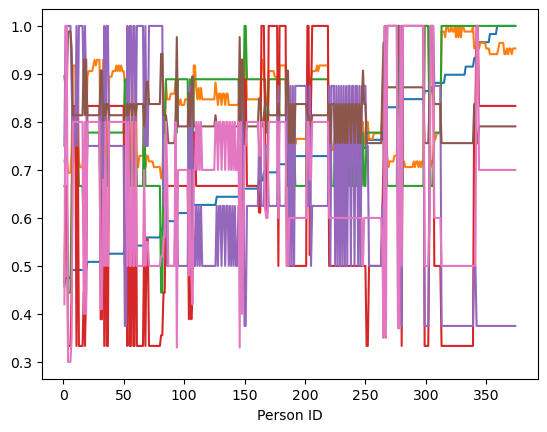

In [26]:
for coluna in df_num:
    df_num[coluna].plot()

`Ajustando o boxplot anterior`

In [28]:
import matplotlib.pyplot as plt

[Text(1, 0, 'Age'),
 Text(2, 0, 'Sleep Duration'),
 Text(3, 0, 'Quality of Sleep'),
 Text(4, 0, 'Physical Activity Level'),
 Text(5, 0, 'Stress Level'),
 Text(6, 0, 'Heart Rate'),
 Text(7, 0, 'Daily Steps')]

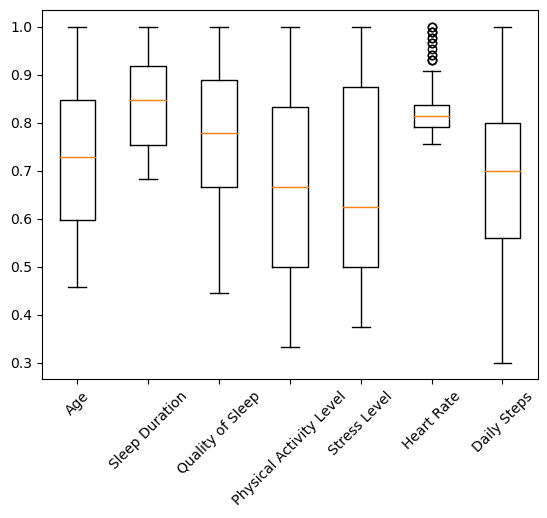

In [29]:
fig, ax = plt.subplots()
ax.boxplot(df_num)
ax.set_xticklabels(df_num.columns ,rotation=45) # Alternativa 1 para ajustar as legendas que estavam sobrepostas
#fig.set_size_inches(16.5, 6.5, forward=True) # Alternativa 2 para ajustar as legendas que estavam sobrepostas

`Usando o Seaborn`

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Sleep Duration'),
  Text(2, 0, 'Quality of Sleep'),
  Text(3, 0, 'Physical Activity Level'),
  Text(4, 0, 'Stress Level'),
  Text(5, 0, 'Heart Rate'),
  Text(6, 0, 'Daily Steps')])

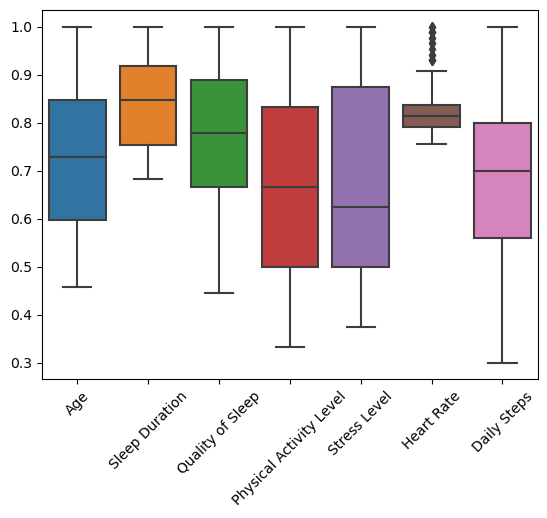

In [30]:
#plt.figure(figsize=(16,6))
sns.boxplot(df_num)
plt.xticks(rotation=45)

# Análises Cruzadas

<Axes: xlabel='Stress Level', ylabel='Age'>

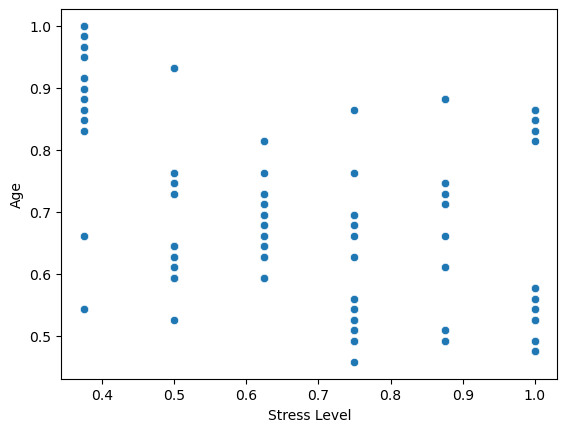

In [31]:
sns.scatterplot(x=df_num['Stress Level'],y=df_num['Age'])

Percebos que o nível de estresse que possuia uma correlação negativa com a idade (ou seja, são inversamente proporcionais), indica visualmente que conforme a idade da pessoa aumenta, menor seu estresse (para estes dados)

<Axes: xlabel='Stress Level', ylabel='Quality of Sleep'>

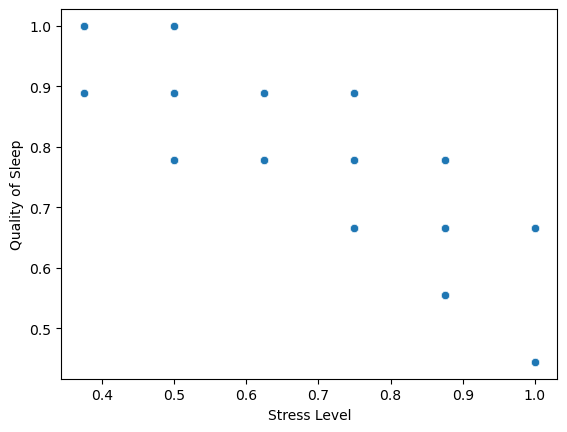

In [32]:
sns.scatterplot(x=df_num['Stress Level'],y=df_num['Quality of Sleep'])

A pesar da correalação negativa forte entre os dois atributos, este tipo de visualização não ajuda a indentificar a predominância de piores qualidades de sono em maiores níveis de estresse, devido as sobreposições dos pontos

# Questionamento levantados:

- Existem grupos de pessoas que são mais propensas a terem disturbios no seu sono? Quais são essas pessoas
- Será que homens ou mulheres tendem a ter dificuldades ao dormir?
- A profissão de uma pessoa pode influir na qualidade do seu sono?
- O estilo de vida sedentário ou não influi na qualidade do sono das pessoas, de maneira geral?

#### a.`Será que homens tendem a ter mais dificuldade com sono, ou as mulheres?`

In [62]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='Stress Level'>

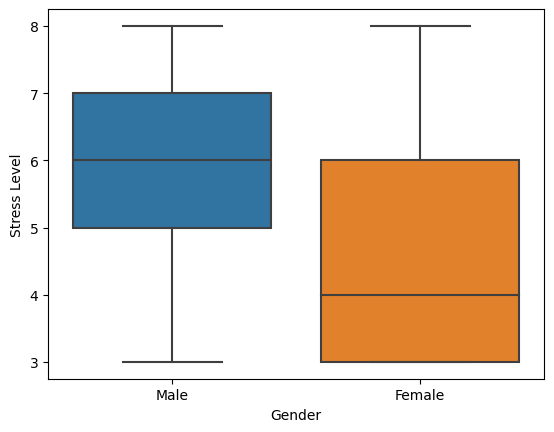

In [63]:
sns.boxplot(y=df['Stress Level'],x=df['Gender'])

`Tem como enriquecer mais essa informação? Ela é sufiente para por exemplo, uma empresa de calmantes direcionar seus esforços em marketing para homens?`

#### `A profissão de uma pessoa pode influir na qualidade do seu sono?`

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Teacher'),
  Text(4, 0, 'Nurse'),
  Text(5, 0, 'Engineer'),
  Text(6, 0, 'Accountant'),
  Text(7, 0, 'Scientist'),
  Text(8, 0, 'Lawyer'),
  Text(9, 0, 'Salesperson'),
  Text(10, 0, 'Manager')])

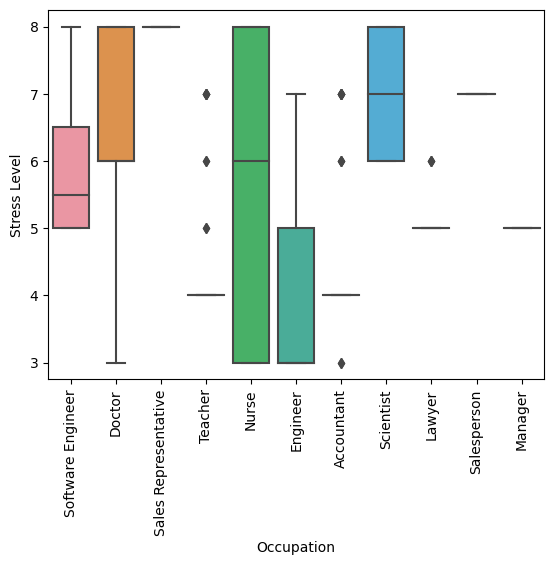

In [33]:
sns.boxplot(y=df['Stress Level'],x=df['Occupation'])
plt.xticks(rotation=90)

Curiosamente, os Representantes de vendas (Sales Representative), possuem um boxplot do tipo linha, indicando que os 3 quartis e extremidades possuem mesmo valor, ou seja, todos os representantes possuem nível de estresse máximo. Porém, quão relevante é essa informação? Para saber a resposta, precisamos saber a proporção desta ocupação em relação aos dados completos

Quantos Vendedores existem na base?

In [34]:
df['Occupation'].value_counts(normalize=True)

Nurse                   0.195187
Doctor                  0.189840
Engineer                0.168449
Lawyer                  0.125668
Teacher                 0.106952
Accountant              0.098930
Salesperson             0.085561
Software Engineer       0.010695
Scientist               0.010695
Sales Representative    0.005348
Manager                 0.002674
Name: Occupation, dtype: float64

Percebemos que os representantes de representam apenas 0,2% dos respondentes, ou seja, não podemos inferir que o fato de uma pessoa ser representante de vendas indica que ela é mais estressada e tem pior sono. Como se comportam os demais dados sobre os vendedores, que são mais representativos e possuem alto estresse?

In [67]:
df[df['Occupation']=='Salesperson']

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
178,Male,42,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
188,Male,43,Salesperson,6.3,6,45,7,Overweight,130/85,72,6000,Insomnia
190,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
192,Male,43,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia
193,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
194,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
195,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
196,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
197,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia


O peso parece ser outro padrão a se estudar!!

In [36]:
# Relação Peso-Qualidade do sono

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Overweight'),
  Text(1, 0, 'Normal'),
  Text(2, 0, 'Obese'),
  Text(3, 0, 'Normal Weight')])

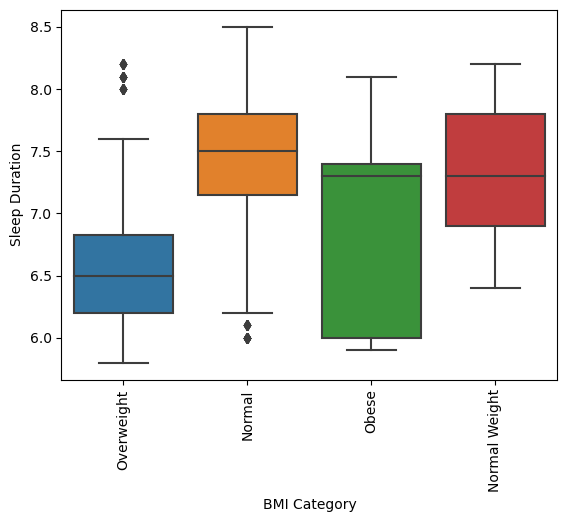

In [37]:
sns.boxplot(y=df['Sleep Duration'],x=df['BMI Category'])
plt.xticks(rotation=90)

# E agora, o que vocês percebem sobre os atributos da base?

`Avaliar de forma pareada os dados não parece ser suficiente para obter resultados representativos acerca dos grupos pertencentes as bases, para traçar por exemplo, o perfil de pessoas que uma empresa pode focar seus esforços para vender mais calmantes e remédios de sono`

In [70]:
!pip install plotly

In [38]:
import plotly.express as px

### Aparentemente, análises pareadas não se mostram suficientes para compreensão, usaremos então:

![plotly](logo.png)

### Visualização de dados:
- Gráficos Ricos
    - Treemap
    - Parallel Coordinates - Gráfico de coordenaldas paralelas

In [39]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

#### Para quem neste ponto, possuir o atributo 'Sleep Disorder' com dados faltantes, aplicar uma das seguintes correções

Correção 1

In [40]:
problemas = ['None','Sleep Apnea', 'Insomnia']

In [85]:
count = 0
for prob in df['Sleep Disorder']:
    if type(prob) == 'NaN':
        df['Sleep Disorder'][count] = random.choices(problemas)[0]
    count+=1

Correção 2: OBS, mais simples, porém induz viés

In [ ]:
df['Sleep Disorder'].fillna('None')

In [84]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [79]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [42]:
import plotly.express as px

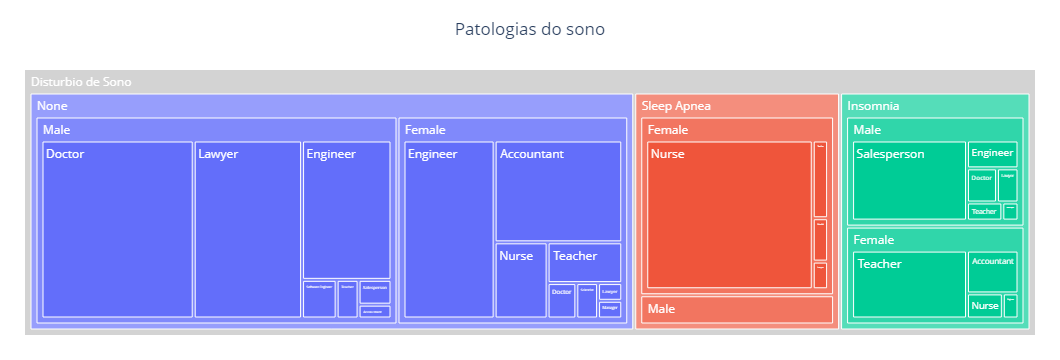

In [53]:
fig = px.treemap(df,path=[px.Constant('Disturbio de Sono'),'Sleep Disorder','Gender','Occupation'],
                        values='Sleep Duration',maxdepth=4)

fig.update_layout(uniformtext_minsize=18)
fig.update_traces(root_color="lightgray",textfont_color='rgb(255,255,255)')

fig.update_layout(
title_text='Patologias do sono',title_x=0.5
                        )
fig.update_layout(margin = dict(t=70, l=25, r=25, b=25))

fig.show()

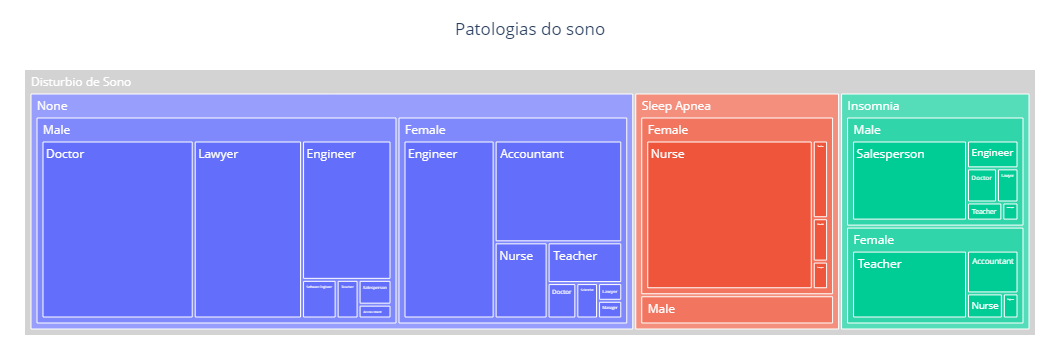

<b> O gráfico gerado é interativo, este em formato de imagem, é apenas para ilustrar o resultado

In [54]:
df['Physical Activity Level']

Person ID
1      42
2      60
3      60
4      30
5      30
       ..
370    75
371    75
372    75
373    75
374    75
Name: Physical Activity Level, Length: 374, dtype: int64

In [55]:
df['Daily Steps'].value_counts()

8000     101
6000      68
5000      68
7000      66
10000     36
5500       4
3000       3
3500       3
4000       3
6800       3
4800       2
7300       2
7500       2
4200       2
3300       2
5600       2
5200       2
4100       2
3700       2
6200       1
Name: Daily Steps, dtype: int64

#### Podemos criar um indicador a partir destas informações? Temos conhecimento do domínio?

In [56]:
df_num.reset_index(drop=False,inplace=True)

In [57]:
df_num.columns

Index(['index', 'Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')

## Construção do Gráfico de Coordenadas Paralelas

### LIST COMPREHENTION

In [48]:
list1 = [col for col in df_num.columns]

In [49]:
list1.__len__()

8

In [50]:
a = dict(zip(range(1,9),list1))

In [51]:
a

{1: 'Person ID',
 2: 'Age',
 3: 'Sleep Duration',
 4: 'Quality of Sleep',
 5: 'Physical Activity Level',
 6: 'Stress Level',
 7: 'Heart Rate',
 8: 'Daily Steps'}

C:\Users\ednae\miniconda3\envs\msc\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



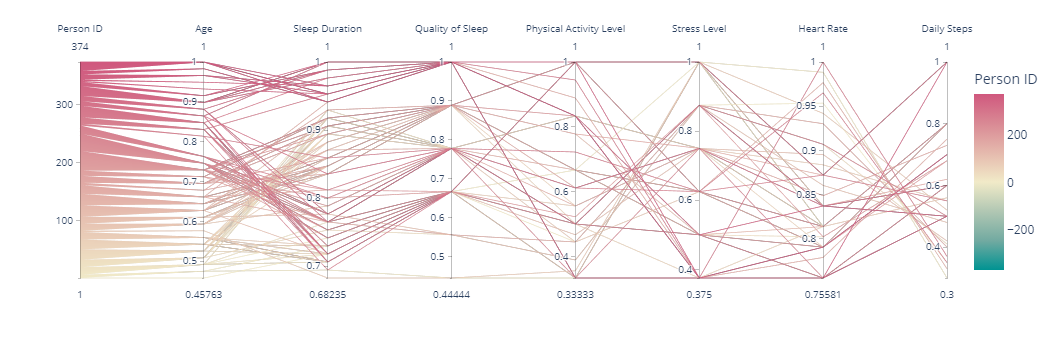

In [52]:
fig = px.parallel_coordinates(df_num, color="Person ID",labels=a,
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

#Electric

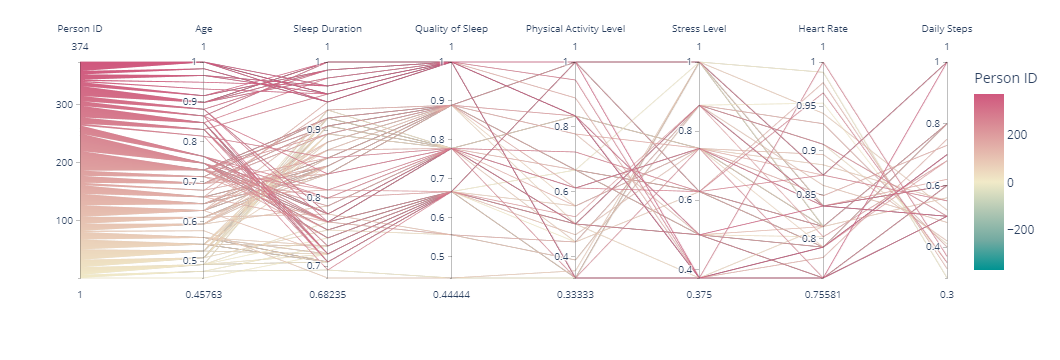

<b> O gráfico gerado é interativo, este em formato de imagem, é apenas para ilustrar o resultado